#  **SATELLITE IMAGE**

Satellite imagery is a crucial technology for evolving industries to better plan urban developments, route worldwide journeys, and respond to disasters among other functions. Here’s how: the high-resolution images captured by satellites can track changes in land use, monitor the conditions of roads, and help identify safe zones during natural disasters like floods to name a few benefits.The past years have witnessed great progress on remote sensing (RS) image interpretation and its wide applications.The term remote sensing is defined as the way of analysing an area from a device or a sensor which is remotely placed like from satellite or from an aerial device. Remotely sensed images capture continuous view of earth surface covering a large area and thereby help in detailed monitoring and assessment of the same.  With RS images becoming more accessible than ever before, there is an increasing demand for the automatic interpretation of these images.

In [ ]:
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
datapath="/content/drive/MyDrive/satellite_image"
Categories=os.listdir(datapath)
Categories


['cloudy', 'desert', 'water', 'green_area']

In [ ]:

X=[]
y=[]
for category in Categories:
  dirpath=os.path.join(datapath,category)
  images=os.listdir(dirpath)
  for img in images:
    img_path=os.path.join(dirpath,img)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,3))
    X.append(img_resized)
    y.append(Categories.index(category))
  print('Loaded....',category)

Loaded.... cloudy
Loaded.... desert
Loaded.... water
Loaded.... green_area


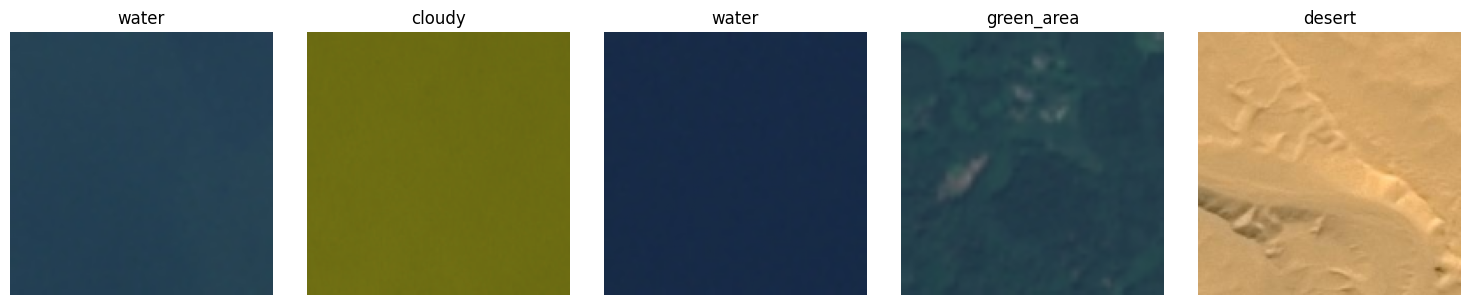

In [ ]:
def display_random_images(X, y, categories, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        index = np.random.randint(len(X))
        axes[i].imshow(X[index])
        axes[i].set_title(categories[y[index]])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage: Display 5 random images
display_random_images(X, y, Categories, num_images=5)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
len(X_train),len(y_train)

(4504, 4504)

In [ ]:
len(X_test),len(y_test)

(1127, 1127)

In [ ]:

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

CNN MODEL

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))

model.add(Dense(4,activation='softmax'))

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [ ]:
print(X_train.dtype, X_train.shape)
print(y_train.dtype)

float64 (4504, 150, 150, 3)
int64


In [ ]:
history=model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/20
282/282 [==============================] - 166s 583ms/step - loss: 0.5183 - accuracy: 0.8344 - val_loss: 0.2325 - val_accuracy: 0.9113
Epoch 2/20
282/282 [==============================] - 159s 565ms/step - loss: 0.2464 - accuracy: 0.8910 - val_loss: 0.1922 - val_accuracy: 0.9113
Epoch 3/20
282/282 [==============================] - 161s 570ms/step - loss: 0.2107 - accuracy: 0.9010 - val_loss: 0.1579 - val_accuracy: 0.9255
Epoch 4/20
282/282 [==============================] - 161s 570ms/step - loss: 0.1892 - accuracy: 0.9132 - val_loss: 0.2068 - val_accuracy: 0.9006
Epoch 5/20
282/282 [==============================] - 151s 537ms/step - loss: 0.1878 - accuracy: 0.9150 - val_loss: 0.1697 - val_accuracy: 0.9139
Epoch 6/20
282/282 [==============================] - 158s 559ms/step - loss: 0.1671 - accuracy: 0.9261 - val_loss: 0.1570 - val_accuracy: 0.9299
Epoch 7/20
282/282 [==============================] - 156s 554ms/step - loss: 0.1566 - accuracy: 0.9312 - val_loss: 0.1881 -

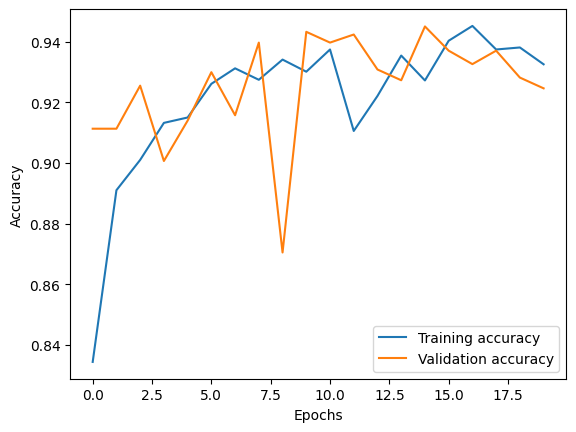

In [ ]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

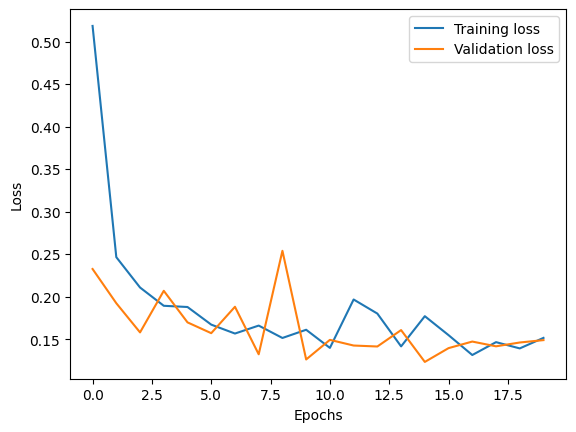

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

array([[[239, 245, 185],
        [223, 226, 171],
        [228, 227, 179],
        ...,
        [223, 232, 215],
        [224, 231, 215],
        [230, 232, 219]],

       [[200, 206, 158],
        [211, 214, 169],
        [227, 225, 186],
        ...,
        [224, 231, 215],
        [224, 231, 215],
        [229, 231, 218]],

       [[ 34,  38,  13],
        [ 51,  55,  30],
        [111, 110,  89],
        ...,
        [224, 231, 213],
        [224, 231, 215],
        [227, 231, 217]],

       ...,

       [[201, 154, 110],
        [198, 154, 107],
        [198, 154, 109],
        ...,
        [212, 223, 165],
        [237, 245, 188],
        [198, 199, 157]],

       [[201, 154, 110],
        [198, 154, 109],
        [198, 154, 109],
        ...,
        [211, 219, 159],
        [196, 201, 143],
        [180, 181, 139]],

       [[198, 153, 112],
        [196, 153, 111],
        [196, 152, 113],
        ...,
        [210, 206, 161],
        [214, 211, 168],
        [211, 208, 173]]], dtype=uint8)
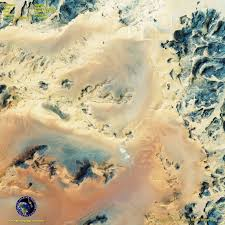

In [ ]:
impath="/content/drive/MyDrive/sahara_desert.jpeg"
img=imread(impath)
img


In [ ]:
img=resize(img,(150,150,3))


In [ ]:
img=img.reshape(1,150,150,3)
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 147ms/step


array([[1.0472602e-29, 1.0000000e+00, 2.0403297e-16, 0.0000000e+00]],
      dtype=float32)

In [ ]:
ind=y_new.argmax(axis=1)
ind

array([1])

In [ ]:
Categories[ind.item()]

'desert'

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
